In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import dataframe with Description split into 2 columns: DescriptionClean (text only - need more cleaning) & WebsiteLink
df = pd.read_csv('databreaches650.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          650 non-null    object
 1   Title         650 non-null    object
 2   Domain        624 non-null    object
 3   BreachDate    650 non-null    object
 4   AddedDate     650 non-null    object
 5   ModifiedDate  650 non-null    object
 6   PwnCount      650 non-null    int64 
 7   Description   650 non-null    object
 8   LogoPath      650 non-null    object
 9   DataClasses   650 non-null    object
 10  IsVerified    650 non-null    bool  
 11  IsFabricated  650 non-null    bool  
 12  IsSensitive   650 non-null    bool  
 13  IsRetired     650 non-null    bool  
 14  IsSpamList    650 non-null    bool  
 15  IsMalware     650 non-null    bool  
dtypes: bool(6), int64(1), object(9)
memory usage: 54.7+ KB


In [3]:
df.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45,2017-12-10 21:44:27,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50,2020-11-15 01:07:10,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False
2,126,126,126.com,2012-01-01,2016-10-08 07:46:05,2016-10-08 07:46:05,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False
3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03,2016-07-08 01:55:03,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",True,False,False,False,False,False
4,17173,17173,17173.com,2011-12-28,2018-04-28 04:53:15,2018-04-28 04:53:15,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",False,False,False,False,False,False


In [4]:
df.tail()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware
645,Zurich,Zurich,zurich.co.jp,2023-01-08,2023-01-22 22:30:56,2023-01-22 22:30:56,756737,"In January 2023, <a href=""https://therecord.me...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False
646,Zynga,Zynga,zynga.com,2019-09-01,2019-12-19 04:54:45,2020-01-11 00:41:51,172869660,"In September 2019, game developer <a href=""htt...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Phone number...",True,False,False,False,False,False
647,Parapa,ÐŸÐ°Ñ€Ð° ÐŸÐ°,parapa.mail.ru,2016-08-08,2016-12-28 07:03:17,2016-12-28 07:03:17,4946850,"In August 2016, <a href=""http://www.zdnet.com/...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",True,False,False,False,False,False
648,SprashivaiRu,Ð¡Ð¿Ñ€Ð°ÑˆÐ¸Ð²Ð°Ð¹.Ñ€Ñƒ,sprashivai.ru,2015-05-11,2015-05-12 23:50:08,2015-05-12 23:50:08,3474763,"In May 2015, <a href=""http://sprashivai.ru/"" t...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False
649,DecoratingTheHouse,ì§‘ê¾¸ë¯¸ê¸°,ggumim.co.kr,2020-03-27,2020-08-02 05:34:42,2020-08-02 05:34:42,1298651,"In March 2020, the Korean interior decoration ...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Names', 'Phone numbers', ...",True,False,False,False,False,False


### Split description text and website link

In [5]:
# GET DISCRIPTION WITHOUT LINK

from bs4 import BeautifulSoup
from html.parser import HTMLParser
class MLStripper(HTMLParser):
    def __init__(self):
        # initialize the base class
        HTMLParser.__init__(self)

    def read(self, data):
        # clear the current output before re-use
        self._lines = []
        # re-set the parser's state before re-use
        self.reset()
        self.feed(data)
        return ''.join(self._lines)

    def handle_data(self, d):
        self._lines.append(d)

def strip_tags(html):
    s = MLStripper()
    return s.read(html)


def get_link(html):
    s = MLStripper()
    return s.handle_starttag(html)

df['DescriptionText'] = df['Description'].apply(lambda x: strip_tags(x))


# GET WEBSITE LINK

def GetHTMLLink(text):
    
    # Parsing
    soup = BeautifulSoup(text, 'html.parser') 

    # Find <a> tag that have a href attr
    a_tag = soup.find('a', href=True) 
    if a_tag is not None:
        return a_tag['href']
    else:
        return None
    
df['WebsiteLink'] = df['Description'].apply(lambda x: GetHTMLLink(x))

In [6]:
df.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,DescriptionText,WebsiteLink
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45,2017-12-10 21:44:27,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,"In approximately March 2015, the free web host...",http://www.troyhunt.com/2015/10/breaches-trade...
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50,2020-11-15 01:07:10,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,"In March 2020, the stock photo site 123RF suff...",https://www.bleepingcomputer.com/news/security...
2,126,126,126.com,2012-01-01,2016-10-08 07:46:05,2016-10-08 07:46:05,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,"In approximately 2012, it's alleged that the C...",http://126.com
3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03,2016-07-08 01:55:03,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",True,False,False,False,False,False,"In April 2016, customer data obtained from the...",http://motherboard.vice.com/read/another-day-a...
4,17173,17173,17173.com,2011-12-28,2018-04-28 04:53:15,2018-04-28 04:53:15,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",False,False,False,False,False,False,"In late 2011, a series of data breaches in Chi...",https://news.softpedia.com/news/China-Investig...


In [7]:
df['DescriptionText'][0]

'In approximately March 2015, the free web hosting provider 000webhost suffered a major data breach that exposed almost 15 million customer records. The data was sold and traded before 000webhost was alerted in October. The breach included names, email addresses and plain text passwords.'

### Create a function to expand text

In [8]:
import contractions

def expand_word(text):
    expanded_words = []  
    for word in text.split():
        # using contractions.fix to expand the shortened words
        expanded_words.append(contractions.fix(word))
        
    # Return expanded text
    return ' '.join(expanded_words)

In [9]:
df['DescriptionClean'] = df['DescriptionText'].apply(lambda x: expand_word(x)) 

In [10]:
df['DescriptionClean'][8]

'In approximately 2011, it is alleged that the Chinese gaming site known as 7k7k suffered a data breach that impacted 9.1 million subscribers. Whilst there is evidence that the data is legitimate, due to the difficulty of emphatically verifying the Chinese breach it has been flagged as "unverified". The data in the breach contains usernames, email addresses and plain text passwords. Read more about Chinese data breaches in Have I Been Pwned.'

### Create a function to clean Description column

In [11]:
df['DescriptionClean'].tail()

645    In January 2023, the Japanese arm of Zurich in...
646    In September 2019, game developer Zynga (the c...
647    In August 2016, the Russian gaming site known ...
648    In May 2015, Ð¡Ð¿Ñ€Ð°ÑˆÐ¸Ð²Ð°Ð¹.Ñ€Ñƒ (a the Ru...
649    In March 2020, the Korean interior decoration ...
Name: DescriptionClean, dtype: object

In [12]:
import re

def clean_text(text):
    
    if text !="":
        # Remove special characters replace them with spaces
        text = re.sub(r'[^\w\s]', '', text)

        # Remove apostrophes followed by "s" 
        text = re.sub(r"'s\b", '', text)
        
        # Remove non-English characters
        text = ''.join(idx for idx in text if not re.findall("[^\u0000-\u05C0\u2100-\u214F]+", idx))

        # Match any Russian characters using the Cyrillic script range
        russian_pattern = re.compile('[\u0400-\u04FF]+')
        
        # Replace the Russian characters with an empty string
        text = re.sub(russian_pattern, '', text)
        
        # Remove word that contains number
        # text = re.sub(r'\w*\d\w*', '', text).strip()
        
        # Remove digits
        # text = re.sub(r'[0-9]+', '', text)
        
        # Remove characters that are not a-z or A-Z or 0-9
        text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
        
        # Remove leading and trailing spaces and any remaining consecutive spaces
        text = re.sub(r'\s+', ' ', text.strip())
        
        return text
    else:
        return ""

In [13]:
df['DescriptionClean'] = df['DescriptionClean'].apply(lambda x: clean_text(x))

In [14]:
df['DescriptionClean'].tail()

645    In January 2023 the Japanese arm of Zurich ins...
646    In September 2019 game developer Zynga the cre...
647    In August 2016 the Russian gaming site known a...
648    In May 2015 a the Russian website for anonymou...
649    In March 2020 the Korean interior decoration w...
Name: DescriptionClean, dtype: object

### Feature Engineering - Cluster of Description using Sentence Transformer & Kmeans

In [15]:
# Turn to a list
corpus = df['DescriptionClean'].tolist()

In [16]:
# Ref: https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/clustering/kmeans.py

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

embedder = SentenceTransformer('all-MiniLM-L6-v2')

corpus_embeddings = embedder.encode(corpus)

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

C:\Apps\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Apps\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Cluster  1
['In 2016 the site dedicated to helping people hack email and online gaming accounts known as Abusewithus suffered multiple data breaches The site allegedly had an administrator in common with the nefarious LeakedSource site both of which have since been shut down The exposed data included more than 13 million unique email addresses often accompanied by usernames IP addresses and plain text or hashed passwords retrieved from various sources and intended to be used to compromise the victims accounts', 'In November 2014 the acne website acneorg suffered a data breach that exposed over 430k forum members accounts The data was being actively traded on underground forums and included email addresses birth dates and passwords', 'In October 2013 153 million Adobe accounts were breached with each containing an internal ID username email encrypted password and a password hint in plain text The password cryptography was poorly done and many were quickly resolved back to plain text The

In [17]:
# Check length of each cluster
for i, cluster in enumerate(clustered_sentences):
    print(f'Cluster {i+1} has length: {len(cluster)}')
    print("")

Cluster 1 has length: 127

Cluster 2 has length: 155

Cluster 3 has length: 196

Cluster 4 has length: 88

Cluster 5 has length: 84



In [18]:
def map_description_to_cluster(text):
    for i, cluster in enumerate(clustered_sentences):
        if text in cluster:
           # Remove the text from cluster
           cluster.remove(text)
           # Return cluster number
           return i + 1

In [19]:
df['Description_Cluster'] = df['DescriptionClean'].apply(lambda x: map_description_to_cluster(x))

In [20]:
vc = df['Description_Cluster'].value_counts()

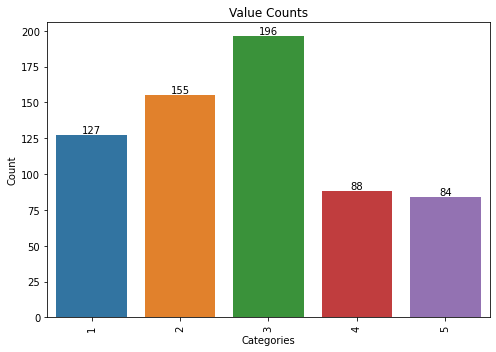

In [21]:
# Visualise 

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=vc.index, y=vc.values)

# Display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Value Counts')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Create new column for Length/Word count

In [22]:
df['Length'] = df['DescriptionClean'].apply(lambda x: len(x.split()))

In [23]:
df.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,...,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,DescriptionText,WebsiteLink,DescriptionClean,Description_Cluster,Length
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45,2017-12-10 21:44:27,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,False,False,False,False,False,"In approximately March 2015, the free web host...",http://www.troyhunt.com/2015/10/breaches-trade...,In approximately March 2015 the free web hosti...,3,44
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50,2020-11-15 01:07:10,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,False,False,False,False,False,"In March 2020, the stock photo site 123RF suff...",https://www.bleepingcomputer.com/news/security...,In March 2020 the stock photo site 123RF suffe...,2,48
2,126,126,126.com,2012-01-01,2016-10-08 07:46:05,2016-10-08 07:46:05,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",...,False,False,False,False,False,"In approximately 2012, it's alleged that the C...",http://126.com,In approximately 2012 it is alleged that the C...,3,71
3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03,2016-07-08 01:55:03,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",...,False,False,False,False,False,"In April 2016, customer data obtained from the...",http://motherboard.vice.com/read/another-day-a...,In April 2016 customer data obtained from the ...,3,44
4,17173,17173,17173.com,2011-12-28,2018-04-28 04:53:15,2018-04-28 04:53:15,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",...,False,False,False,False,False,"In late 2011, a series of data breaches in Chi...",https://news.softpedia.com/news/China-Investig...,In late 2011 a series of data breaches in Chin...,4,83


### Preprocess text with NLTK

In [24]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [25]:
# Ref: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

# Lemmatize with POS Tag
from nltk.corpus import wordnet
# nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [26]:
def preprocess(text):
    # split into sentences
    sentences = sent_tokenize(text)
    
    # split into words
    tokens = word_tokenize(text)
    
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # Lemmatise the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [27]:
df['Description_nltk'] = df['DescriptionClean'].apply(lambda x: preprocess(x))

In [28]:
df['Description_nltk'].head()

0    approximately march free web host provider suf...
1    march stock photo site suffer data breach impa...
2    approximately allege chinese email service kno...
3    april customer data obtain stream app know app...
4    late series data breach china affected million...
Name: Description_nltk, dtype: object

In [29]:
from nltk.util import ngrams

def bigrams_convert(column, n=2):
    df['bigrams'+'_'+column]=df[column].apply(lambda sentence: list(ngrams(sentence.split(), n)))
    
def trigrams_convert(column, n=3):
    df['trigrams'+'_'+column]=df[column].apply(lambda sentence: list(ngrams(sentence.split(), n)))

In [30]:
bigrams_convert('Description_nltk')
trigrams_convert('Description_nltk')

In [31]:
df.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,...,IsSpamList,IsMalware,DescriptionText,WebsiteLink,DescriptionClean,Description_Cluster,Length,Description_nltk,bigrams_Description_nltk,trigrams_Description_nltk
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45,2017-12-10 21:44:27,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,False,False,"In approximately March 2015, the free web host...",http://www.troyhunt.com/2015/10/breaches-trade...,In approximately March 2015 the free web hosti...,3,44,approximately march free web host provider suf...,"[(approximately, march), (march, free), (free,...","[(approximately, march, free), (march, free, w..."
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50,2020-11-15 01:07:10,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,False,False,"In March 2020, the stock photo site 123RF suff...",https://www.bleepingcomputer.com/news/security...,In March 2020 the stock photo site 123RF suffe...,2,48,march stock photo site suffer data breach impa...,"[(march, stock), (stock, photo), (photo, site)...","[(march, stock, photo), (stock, photo, site), ..."
2,126,126,126.com,2012-01-01,2016-10-08 07:46:05,2016-10-08 07:46:05,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",...,False,False,"In approximately 2012, it's alleged that the C...",http://126.com,In approximately 2012 it is alleged that the C...,3,71,approximately allege chinese email service kno...,"[(approximately, allege), (allege, chinese), (...","[(approximately, allege, chinese), (allege, ch..."
3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03,2016-07-08 01:55:03,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",...,False,False,"In April 2016, customer data obtained from the...",http://motherboard.vice.com/read/another-day-a...,In April 2016 customer data obtained from the ...,3,44,april customer data obtain stream app know app...,"[(april, customer), (customer, data), (data, o...","[(april, customer, data), (customer, data, obt..."
4,17173,17173,17173.com,2011-12-28,2018-04-28 04:53:15,2018-04-28 04:53:15,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",...,False,False,"In late 2011, a series of data breaches in Chi...",https://news.softpedia.com/news/China-Investig...,In late 2011 a series of data breaches in Chin...,4,83,late series data breach china affected million...,"[(late, series), (series, data), (data, breach...","[(late, series, data), (series, data, breach),..."


### Bigrams

In [32]:
from collections import Counter

bigrams = []
for row in df['bigrams_Description_nltk']:
    bigrams.extend(row)
    
print(f'Count of bigrams: {len(bigrams)}')
print("\n")
    
# Count the frequency of each bigram
bigram_frequency = Counter(bigrams)

# Print the frequency of each bigram
# for bigram, frequency in bigram_frequency.items():
#     print(bigram, frequency)
    
# Organize elements by frequency using most_common()
bigrams_organized_by_frequency = bigram_frequency.most_common()

# Print the elements organized by frequency
for element, frequency in bigrams_organized_by_frequency:
    print(element, frequency)

Count of bigrams: 21990


('email', 'address') 508
('data', 'breach') 464
('suffer', 'data') 349
('password', 'store') 227
('unique', 'email') 227
('ip', 'address') 193
('data', 'include') 167
('provide', 'hibp') 160
('breach', 'expose') 147
('data', 'provide') 146
('phone', 'number') 139
('email', 'ip') 107
('salt', 'hash') 105
('password', 'hash') 97
('include', 'email') 95
('address', 'password') 94
('million', 'unique') 93
('date', 'birth') 91
('plain', 'text') 89
('hash', 'data') 88
('include', 'name') 87
('usernames', 'email') 83
('address', 'usernames') 77
('physical', 'address') 76
('expose', 'data') 75
('bcrypt', 'hash') 73
('hack', 'forum') 73
('hibp', 'source') 70
('source', 'request') 69
('request', 'attribute') 69
('include', 'usernames') 68
('personal', 'information') 67
('name', 'phone') 63
('address', 'name') 62
('store', 'salt') 61
('data', 'contain') 59
('hash', 'password') 59
('store', 'bcrypt') 58
('hibp', 'dehashedcom') 56
('breach', 'data') 51
('text', 'password')

('found', 'left') 3
('address', 'social') 3
('address', 'alone') 3
('alone', 'provide') 3
('impact', 'user') 3
('victim', 'data') 3
('december', 'breach') 3
('password', 'also') 3
('hacker', 'know') 3
('almost', 'email') 3
('forum', 'website') 3
('october', 'online') 3
('address', 'record') 3
('record', 'date') 3
('multiple', 'different') 3
('broadly', 'circulate') 3
('account', 'owner') 3
('reuse', 'password') 3
('password', 'reuse') 3
('without', 'password') 3
('researcher', 'vinny') 3
('subset', 'data') 3
('left', 'expose') 3
('information', 'name') 3
('information', 'almost') 3
('online', 'via') 3
('forum', 'impact') 3
('hash', 'without') 3
('armor', 'game') 3
('account', 'password') 3
('may', 'online') 3
('account', 'impact') 3
('website', 'expose') 3
('nearly', 'user') 3
('member', 'expose') 3
('service', 'create') 3
('minecraft', 'server') 3
('number', 'email') 3
('advise', 'customer') 3
('appear', 'popular') 3
('state', 'data') 3
('publish', 'online') 3
('million', 'individual'

('flag', 'sensitive') 2
('attack', 'leak') 2
('attack', 'attribute') 2
('data', 'plain') 2
('freedom', 'host') 2
('host', 'ii') 2
('impact', 'site') 2
('funny', 'game') 2
('acknowledge', 'breach') 2
('user', 'base') 2
('city', 'user') 2
('well', 'password') 2
('private', 'chat') 2
('creation', 'website') 2
('website', 'game') 2
('early', 'video') 2
('expose', 'site') 2
('site', 'later') 2
('account', 'publicly') 2
('leak', 'breach') 2
('account', 'compromise') 2
('name', 'social') 2
('hash', 'almost') 2
('record', 'extract') 2
('public', 'profile') 2
('address', 'full') 2
('data', 'cover') 2
('name', 'data') 2
('gender', 'link') 2
('get', 'revenge') 2
('revenge', 'ex') 2
('data', 'span') 2
('span', 'customer') 2
('share', 'public') 2
('surface', 'allegedly') 2
('comment', 'left') 2
('manga', 'website') 2
('website', 'go') 2
('go', 'game') 2
('include', 'customer') 2
('incident', 'data') 2
('address', 'span') 2
('hash', 'small') 2
('number', 'partial') 2
('post', 'dark') 2
('directly', 

('affected', 'subscriber') 1
('approximately', 'anime') 1
('anime', 'website') 1
('website', 'animeplanet') 1
('animeplanet', 'suffer') 1
('account', 'bcrypt') 1
('july', 'cloudbased') 1
('cloudbased', 'video') 1
('video', 'make') 1
('service', 'animoto') 1
('animoto', 'suffer') 1
('birth', 'country') 1
('country', 'origin') 1
('origin', 'salt') 1
('december', 'huge') 1
('refer', 'anti') 1
('anti', 'public') 1
('public', 'list') 1
('july', 'sale') 1
('sale', 'engagement') 1
('engagement', 'startup') 1
('startup', 'apollo') 1
('apollo', 'left') 1
('contain', 'billion') 1
('billion', 'data') 1
('data', 'point') 1
('point', 'publicly') 1
('expose', 'without') 1
('discover', 'security') 1
('troia', 'subsequently') 1
('subsequently', 'sent') 1
('sent', 'subset') 1
('address', 'pwned') 1
('expose', 'apollo') 1
('apollo', 'use') 1
('use', 'revenue') 1
('revenue', 'acceleration') 1
('acceleration', 'platform') 1
('well', 'professional') 1
('professional', 'information') 1
('include', 'place') 

('february', 'vbulletin') 1
('forum', 'marijuana') 1
('marijuana', 'site') 1
('site', 'cannabiscom') 1
('cannabiscom', 'breach') 1
('whilst', 'public') 1
('public', 'attribution') 1
('attribution', 'breach') 1
('include', 'account') 1
('account', 'nearly') 1
('nearly', 'private') 1
('message', 'user') 1
('may', 'graphic') 1
('graphic', 'design') 1
('design', 'tool') 1
('tool', 'website') 1
('website', 'canva') 1
('canva', 'suffer') 1
('city', 'residence') 1
('user', 'use') 1
('use', 'social') 1
('logins', 'data') 1
('december', 'economic') 1
('economic', 'research') 1
('research', 'company') 1
('company', 'capital') 1
('capital', 'economics') 1
('economics', 'suffer') 1
('title', 'employer') 1
('employer', 'impact') 1
('december', 'card') 1
('come', 'month') 1
('month', 'another') 1
('forum', 'march') 1
('march', 'card') 1
('june', 'news') 1
('broke', 'cashcrate') 1
('cashcrate', 'suffer') 1
('breach', 'cashforsurveys') 1
('cashforsurveys', 'site') 1
('site', 'date') 1
('november', 'ex

('afterwards', 'information') 1
('information', 'remains') 1
('remains', 'precise') 1
('precise', 'nature') 1
('nature', 'base') 1
('base', 'enquiry') 1
('enquiry', 'make') 1
('make', 'via') 1
('appear', 'mail') 1
('mail', 'service') 1
('service', 'possibly') 1
('possibly', 'base') 1
('base', 'powermta') 1
('powermta', 'use') 1
('use', 'deliver') 1
('deliver', 'spam') 1
('spam', 'log') 1
('log', 'contain') 1
('email', 'recipient') 1
('recipient', 'name') 1
('address', 'mail') 1
('mail', 'server') 1
('server', 'ip') 1
('email', 'subject') 1
('subject', 'track') 1
('track', 'information') 1
('include', 'mail') 1
('mail', 'open') 1
('open', 'click') 1
('october', 'blog') 1
('blog', 'comment') 1
('comment', 'service') 1
('service', 'disqus') 1
('disqus', 'announce') 1
('identify', 'year') 1
('data', 'finally') 1
('finally', 'surface') 1
('surface', 'breach') 1
('user', 'create') 1
('create', 'logins') 1
('logins', 'disqus') 1
('disqus', 'salt') 1
('whilst', 'user') 1
('user', 'log') 1
('lo

('record', 'release') 1
('release', 'contain') 1
('february', 'musicbased') 1
('know', 'flash') 1
('revolution', 'hack') 1
('july', 'musicbased') 1
('game', 'flash') 1
('revolution', 'suffer') 1
('breach', 'imapcted') 1
('imapcted', 'almost') 1
('member', 'addition') 1
('addition', 'data') 1
('service', 'email') 1
('ip', 'addesses') 1
('addesses', 'usernames') 1
('february', 'swedish') 1
('swedish', 'forum') 1
('know', 'flashback') 1
('flashback', 'sensitive') 1
('sensitive', 'internal') 1
('data', 'member') 1
('member', 'publish') 1
('publish', 'via') 1
('via', 'tabloid') 1
('tabloid', 'newspaper') 1
('newspaper', 'aftonbladet') 1
('aftonbladet', 'data') 1
('allegedly', 'sell') 1
('via', 'researchgruppen') 1
('researchgruppen', 'research') 1
('research', 'group') 1
('group', 'history') 1
('expose', 'otherwise') 1
('otherwise', 'anonymous') 1
('anonymous', 'user') 1
('user', 'primarily') 1
('primarily', 'believe') 1
('believe', 'participate') 1
('participate', 'troll') 1
('troll', 'lik

('site', 'incident') 1
('august', 'adult') 1
('adult', 'furry') 1
('furry', 'interactive') 1
('interactive', 'game') 1
('game', 'creator') 1
('creator', 'hth') 1
('studio', 'suffer') 1
('multiple', 'repository') 1
('repository', 'customer') 1
('data', 'several') 1
('surface', 'popular') 1
('along', 'physical') 1
('name', 'order') 1
('order', 'salt') 1
('hash', 'hth') 1
('studio', 'aware') 1
('unknown', 'date') 1
('date', 'approximately') 1
('approximately', 'indian') 1
('indian', 'training') 1
('training', 'assessment') 1
('assessment', 'service') 1
('attack', 'incident') 1
('receive', 'contact') 1
('brazilian', 'travel') 1
('travel', 'agency') 1
('agency', 'hurb') 1
('hurb', 'formerly') 1
('formerly', 'hotel') 1
('hotel', 'urbano') 1
('urbano', 'suffer') 1
('online', 'download') 1
('download', 'follow') 1
('march', 'million') 1
('source', 'idc') 1
('idc', 'game') 1
('game', 'share') 1
('june', 'teen') 1
('teen', 'social') 1
('know', 'idressup') 1
('idressup', 'hack') 1
('expose', 'tim

('item', 'data') 1
('january', 'hacker') 1
('know', 'lizard') 1
('lizard', 'squad') 1
('squad', 'create') 1
('create', 'ddos') 1
('ddos', 'service') 1
('service', 'name') 1
('name', 'lizard') 1
('lizard', 'stresser') 1
('stresser', 'could') 1
('could', 'procure') 1
('procure', 'mount') 1
('mount', 'attack') 1
('attack', 'online') 1
('online', 'target') 1
('target', 'shortly') 1
('shortly', 'thereafter') 1
('thereafter', 'service') 1
('disclosure', 'user') 1
('russian', 'hack') 1
('forum', 'lolzteam') 1
('lolzteam', 'suffer') 1
('member', 'impact') 1
('later', 'redistribute') 1
('redistribute', 'via') 1
('via', 'another') 1
('another', 'hack') 1
('august', 'fashion') 1
('fashion', 'site') 1
('site', 'lookbook') 1
('lookbook', 'suffer') 1
('sale', 'june') 1
('june', 'include') 1
('date', 'plain') 1
('august', 'interactive') 1
('game', 'lord') 1
('lord', 'ring') 1
('ring', 'online') 1
('expose', 'player') 1
('point', 'account') 1
('breach', 'lounge') 1
('board', 'general') 1
('general', '

('nemoweb', 'leak') 1
('leak', 'appear') 1
('appear', 'unprotected') 1
('db', 'data') 1
('consist', 'large') 1
('volume', 'email') 1
('sent', 'service') 1
('address', 'albeit') 1
('albeit', 'many') 1
('many', 'autogenerated') 1
('autogenerated', 'multiple') 1
('contact', 'operator') 1
('operator', 'nemoweb') 1
('nemoweb', 'response') 1
('may', 'set') 1
('originate', 'virtual') 1
('virtual', 'pet') 1
('pet', 'website') 1
('website', 'neopets') 1
('neopets', 'found') 1
('hack', 'several') 1
('include', 'birthdates') 1
('name', 'well') 1
('well', 'almost') 1
('text', 'ip') 1
('present', 'breach') 1
('october', 'chinese') 1
('chinese', 'site') 1
('know', 'netease') 1
('netease', 'locate') 1
('locate', 'report') 1
('impact', 'hundred') 1
('legitimate', 'multiple') 1
('use', 'data') 1
('may', 'ewallet') 1
('know', 'neteller') 1
('neteller', 'suffer') 1
('book', 'promotion') 1
('promotion', 'site') 1
('site', 'netgalley') 1
('netgalley', 'suffer') 1
('july', 'belgian') 1
('belgian', 'social')

('previously', 'appear') 1
('appear', 'hibp') 1
('hibp', 'prior') 1
('prior', 'incident') 1
('incident', 'one') 1
('one', 'expose') 1
('late', 'game') 1
('hack', 'personal') 1
('personal', 'record') 1
('record', 'disclose') 1
('march', 'another') 1
('another', 'july') 1
('july', 'bring') 1
('dump', 'almost') 1
('account', 'rambler') 1
('rambler', 'sometimes') 1
('sometimes', 'refer') 1
('refer', 'russian') 1
('russian', 'yahoo') 1
('yahoo', 'discover') 1
('usernames', 'also') 1
('also', 'form') 1
('form', 'part') 1
('part', 'rambler') 1
('rambler', 'email') 1
('password', 'accord') 1
('accord', 'rambler') 1
('rambler', 'data') 1
('november', 'search') 1
('optimisation', 'management') 1
('company', 'rankwatch') 1
('rankwatch', 'expose') 1
('expose', 'mongo') 1
('db', 'password') 1
('publicly', 'whereupon') 1
('whereupon', 'data') 1
('data', 'exfiltrated') 1
('exfiltrated', 'post') 1
('employer', 'phone') 1
('title', 'table') 1
('table', 'call') 1
('call', 'u') 1
('u', 'email') 1
('email

('imsi', 'number') 1
('number', 'serial') 1
('serial', 'number') 1
('sometime', 'swedish') 1
('swedish', 'magic') 1
('magic', 'website') 1
('website', 'svenskamagic') 1
('svenskamagic', 'suffer') 1
('hibp', 'svenskamagic') 1
('early', 'swedish') 1
('swedish', 'tech') 1
('tech', 'news') 1
('site', 'sweclockers') 1
('sweclockers', 'hack') 1
('store', 'combination') 1
('june', 'egyptian') 1
('egyptian', 'bus') 1
('bus', 'operator') 1
('operator', 'swvl') 1
('swvl', 'suffer') 1
('number', 'profile') 1
('photo', 'partial') 1
('type', 'last') 1
('digit', 'password') 1
('november', 'vietnamese') 1
('vietnamese', 'education') 1
('education', 'website') 1
('website', 'tailieu') 1
('tailieu', 'allegedly') 1
('dehashedcom', 'share') 1
('forum', 'tailieu') 1
('tailieu', 'respond') 1
('february', 'affiliate') 1
('affiliate', 'marketing') 1
('marketing', 'network') 1
('network', 'tamodo') 1
('tamodo', 'suffer') 1
('hash', 'tamodo') 1
('tamodo', 'fail') 1
('attempt', 'report') 1
('report', 'breach') 

('predominantly', 'wellnessrelated') 1
('wellnessrelated', 'domain') 1
('name', 'own') 1
('own', 'entity') 1
('entity', 'multiple') 1
('confirm', 'although') 1
('although', 'could') 1
('could', 'recall') 1
('recall', 'provide') 1
('data', 'specifically') 1
('specifically', 'vtight') 1
('vtight', 'personal') 1
('phone', 'physical') 1
('address', 'accurate') 1
('accurate', 'vtight') 1
('gel', 'reply') 1
('reply', 'multiple') 1
('multiple', 'request') 1
('request', 'comment') 1
('august', 'european') 1
('european', 'stream') 1
('service', 'wakanim') 1
('wakanim', 'suffer') 1
('subsequently', 'advertised') 1
('advertised', 'sell') 1
('december', 'digital') 1
('digital', 'mall') 1
('mall', 'wanelo') 1
('wanelo', 'suffer') 1
('breach', 'april') 1
('april', 'total') 1
('hash', 'initial') 1
('initial', 'hibp') 1
('hibp', 'load') 1
('load', 'data') 1
('name', 'shipping') 1
('shipping', 'address') 1
('hibp', 'albeit') 1
('albeit', 'without') 1
('without', 'direct') 1
('direct', 'association') 1


In [33]:
bigrams_organized_by_frequency[:10][0][0]

('email', 'address')

#### Visualise bigrams

Bigram: email address - Frequency: 508
Bigram: data breach - Frequency: 464
Bigram: suffer data - Frequency: 349
Bigram: password store - Frequency: 227
Bigram: unique email - Frequency: 227
Bigram: ip address - Frequency: 193
Bigram: data include - Frequency: 167
Bigram: provide hibp - Frequency: 160
Bigram: breach expose - Frequency: 147
Bigram: data provide - Frequency: 146


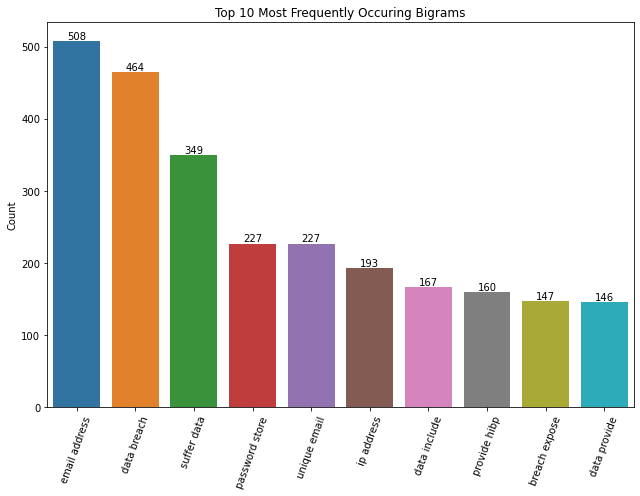

In [34]:
bigrams_organized_by_frequency_10 = bigram_frequency.most_common(10)

# Print the elements organized by frequency
# print('Top 10 trigrams')
bi = []
freq = []

for element, frequency in bigrams_organized_by_frequency_10:
    bigram = ' '.join(element)
    print(f'Bigram: {bigram} - Frequency: {frequency}')
    bi.append(bigram)
    freq.append(frequency)


df_bi = pd.DataFrame({'Bigram': bi, 'Count': freq})

plt.figure(figsize=(9, 7))
ax = sns.barplot(x=df_bi['Bigram'].values, y=df_bi['Count'].values)

# Display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.ylabel('Count')
plt.title('Top 10 Most Frequently Occuring Bigrams')

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

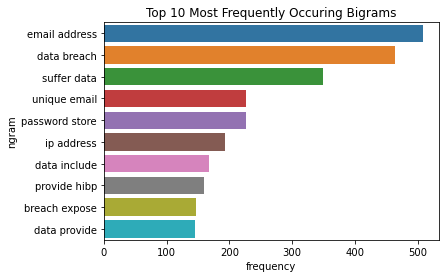

In [35]:
# Alternatively, MOST FREQUENTLY OCCURING N_GRAMS:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['Description_nltk'])
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i],k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:15], y=ngram_freq['ngram'][:10])
plt.title("Top 10 Most Frequently Occuring Bigrams")
plt.show()

### Trigrams

In [36]:
trigrams = []
for row in df['trigrams_Description_nltk']:
    trigrams.extend(row)
    
print(f'Count of trigrams: {len(trigrams)}')
print("\n")
    
# Count the frequency of each trigram
trigram_frequency = Counter(trigrams)

# Organize elements by frequency using most_common()
trigrams_organized_by_frequency = trigram_frequency.most_common()

# Print the elements organized by frequency
for element, frequency in trigrams_organized_by_frequency:
    print(element, frequency)

Count of trigrams: 21340


('suffer', 'data', 'breach') 348
('unique', 'email', 'address') 224
('data', 'provide', 'hibp') 142
('data', 'breach', 'expose') 112
('email', 'ip', 'address') 103
('million', 'unique', 'email') 81
('provide', 'hibp', 'source') 70
('hash', 'data', 'provide') 69
('hibp', 'source', 'request') 69
('source', 'request', 'attribute') 69
('name', 'phone', 'number') 62
('email', 'address', 'password') 61
('address', 'password', 'store') 60
('store', 'salt', 'hash') 60
('password', 'store', 'salt') 59
('password', 'store', 'bcrypt') 57
('store', 'bcrypt', 'hash') 57
('provide', 'hibp', 'dehashedcom') 56
('usernames', 'email', 'address') 53
('include', 'email', 'address') 53
('plain', 'text', 'password') 50
('include', 'usernames', 'email') 49
('address', 'phone', 'number') 45
('expose', 'data', 'include') 44
('data', 'include', 'email') 44
('email', 'address', 'alongside') 43
('ip', 'address', 'usernames') 42
('data', 'breach', 'incident') 41
('popular', 'hack', 'foru

('million', 'unique', 'account') 3
('ip', 'address', 'private') 3
('include', 'name', 'date') 3
('subsequently', 'redistribute', 'popular') 3
('address', 'usernames', 'date') 3
('subsequently', 'distribute', 'online') 3
('identify', 'data', 'breach') 3
('account', 'expose', 'attack') 3
('record', 'include', 'unique') 3
('breach', 'expose', 'thousand') 3
('expose', 'thousand', 'unique') 3
('unique', 'user', 'account') 3
('user', 'account', 'correspond') 3
('account', 'correspond', 'password') 3
('correspond', 'password', 'hash') 3
('data', 'provide', 'support') 3
('million', 'account', 'obtain') 3
('food', 'delivery', 'service') 3
('usernames', 'unsalted', 'password') 3
('dark', 'web', 'site') 3
('customer', 'include', 'name') 3
('include', 'password', 'store') 3
('data', 'breach', 'disclose') 3
('forum', 'expose', 'data') 3
('medium', 'profile', 'password') 3
('profile', 'password', 'store') 3
('include', 'name', 'ip') 3
('personal', 'information', 'customer') 3
('include', 'name', 'ad

('allegedly', 'suffer', 'data') 2
('real', 'estate', 'mogul') 2
('data', 'download', 'unauthorised') 2
('download', 'unauthorised', 'party') 2
('record', 'data', 'appear') 2
('breach', 'almost', 'million') 2
('million', 'customer', 'impact') 2
('customer', 'impact', 'breach') 2
('million', 'customer', 'data') 2
('customer', 'impact', 'data') 2
('spam', 'list', 'know') 2
('contain', 'almost', 'identity') 2
('almost', 'identity', 'data') 2
('data', 'include', 'personal') 2
('attribute', 'name', 'physical') 2
('phone', 'number', 'read') 2
('number', 'read', 'spam') 2
('also', 'expose', 'password') 2
('expose', 'password', 'hash') 2
('breach', 'alongside', 'password') 2
('exposure', 'unique', 'email') 2
('personal', 'detail', 'include') 2
('sell', 'via', 'dark') 2
('real', 'estate', 'website') 2
('request', 'attribute', 'redredredriseupnet') 2
('hash', 'data', 'selfsubmitted') 2
('bcrypt', 'hash', 'subsequently') 2
('september', 'news', 'broke') 2
('incident', 'date', 'back') 2
('history',

('animegame', 'suffer', 'data') 1
('breach', 'incident', 'affected') 1
('incident', 'affected', 'subscriber') 1
('affected', 'subscriber', 'expose') 1
('subscriber', 'expose', 'email') 1
('approximately', 'anime', 'website') 1
('anime', 'website', 'animeplanet') 1
('website', 'animeplanet', 'suffer') 1
('animeplanet', 'suffer', 'data') 1
('impact', 'subscriber', 'expose') 1
('unsalted', 'hash', 'newer') 1
('hash', 'newer', 'account') 1
('newer', 'account', 'bcrypt') 1
('account', 'bcrypt', 'hash') 1
('july', 'cloudbased', 'video') 1
('cloudbased', 'video', 'make') 1
('video', 'make', 'service') 1
('make', 'service', 'animoto') 1
('service', 'animoto', 'suffer') 1
('animoto', 'suffer', 'data') 1
('date', 'birth', 'country') 1
('birth', 'country', 'origin') 1
('country', 'origin', 'salt') 1
('origin', 'salt', 'password') 1
('december', 'huge', 'list') 1
('list', 'refer', 'anti') 1
('refer', 'anti', 'public') 1
('anti', 'public', 'list') 1
('public', 'list', 'contain') 1
('july', 'sale', 

('simple', 'machine', 'base') 1
('machine', 'base', 'forum') 1
('usernames', 'email', 'password') 1
('email', 'password', 'hash') 1
('approximately', 'december', 'allege') 1
('december', 'allege', 'data') 1
('data', 'breach', 'lawyer') 1
('breach', 'lawyer', 'directory') 1
('lawyer', 'directory', 'service') 1
('directory', 'service', 'avvo') 1
('service', 'avvo', 'publish') 1
('avvo', 'publish', 'online') 1
('publish', 'online', 'hack') 1
('hack', 'forum', 'use') 1
('forum', 'use', 'extortion') 1
('use', 'extortion', 'scam') 1
('extortion', 'scam', 'possible') 1
('scam', 'possible', 'exposure') 1
('possible', 'exposure', 'date') 1
('exposure', 'date', 'back') 1
('back', 'earlier', 'data') 1
('address', 'alongside', 'hash') 1
('alongside', 'hash', 'likely') 1
('hash', 'likely', 'represent') 1
('likely', 'represent', 'user') 1
('represent', 'user', 'password') 1
('user', 'password', 'multiple') 1
('password', 'multiple', 'attempt') 1
('attempt', 'contact', 'avvo') 1
('contact', 'avvo', '

('company', 'sent', 'hibp') 1
('sent', 'hibp', 'alongside') 1
('hibp', 'alongside', 'database') 1
('alongside', 'database', 'backup') 1
('database', 'backup', 'gamble') 1
('backup', 'gamble', 'site') 1
('gamble', 'site', 'betalfa') 1
('site', 'betalfa', 'betway') 1
('betalfa', 'betway', 'bongobongo') 1
('betway', 'bongobongo', 'topbet') 1
('bongobongo', 'topbet', 'also') 1
('topbet', 'also', 'include') 1
('also', 'include', 'investigation') 1
('include', 'investigation', 'implicate') 1
('investigation', 'implicate', 'bet') 1
('implicate', 'bet', 'platform') 1
('bet', 'platform', 'provider') 1
('platform', 'provider', 'btobet') 1
('provider', 'btobet', 'common') 1
('btobet', 'common', 'source') 1
('common', 'source', 'data') 1
('source', 'data', 'impact') 1
('user', 'record', 'extensive') 1
('record', 'extensive', 'information') 1
('extensive', 'information', 'gamble') 1
('information', 'gamble', 'history') 1
('march', 'indonesian', 'ecommerce') 1
('indonesian', 'ecommerce', 'website') 

('investigation', 'file', 'also') 1
('file', 'also', 'found') 1
('found', 'contain', 'data') 1
('contain', 'data', 'indicate') 1
('data', 'indicate', 'source') 1
('indicate', 'source', 'armor') 1
('source', 'armor', 'game') 1
('armor', 'game', 'subsequent') 1
('game', 'subsequent', 'verification') 1
('subsequent', 'verification', 'hibp') 1
('confirm', 'password', 'previously') 1
('password', 'previously', 'use') 1
('previously', 'use', 'many') 1
('use', 'many', 'subscriber') 1
('many', 'subscriber', 'use') 1
('subscriber', 'use', 'either') 1
('use', 'either', 'coupon') 1
('either', 'coupon', 'mom') 1
('coupon', 'mom', 'armor') 1
('mom', 'armor', 'game') 1
('armor', 'game', 'past') 1
('game', 'past', 'disclosure') 1
('past', 'disclosure', 'organisation') 1
('disclosure', 'organisation', 'found') 1
('organisation', 'found', 'data') 1
('found', 'data', 'represent') 1
('data', 'represent', 'entire') 1
('represent', 'entire', 'customer') 1
('entire', 'customer', 'base') 1
('customer', 'base

('last', 'four', 'digit') 1
('four', 'digit', 'card') 1
('january', 'doxing', 'website') 1
('doxing', 'website', 'design') 1
('website', 'design', 'disclose') 1
('design', 'disclose', 'personal') 1
('personal', 'information', 'target') 1
('information', 'target', 'individual') 1
('target', 'individual', 'doxes') 1
('individual', 'doxes', 'doxbin') 1
('doxes', 'doxbin', 'suffer') 1
('doxbin', 'suffer', 'data') 1
('breach', 'subsequently', 'leak') 1
('subsequently', 'leak', 'online') 1
('leak', 'online', 'include') 1
('online', 'include', 'unique') 1
('user', 'account', 'doxes') 1
('account', 'doxes', 'user') 1
('doxes', 'user', 'account') 1
('user', 'account', 'also') 1
('password', 'hash', 'browser') 1
('hash', 'browser', 'user') 1
('user', 'agent', 'personal') 1
('agent', 'personal', 'information') 1
('personal', 'information', 'disclose') 1
('information', 'disclose', 'doxes') 1
('disclose', 'doxes', 'often') 1
('doxes', 'often', 'extensive') 1
('often', 'extensive', 'include') 1
('d

('faceup', 'advise', 'identify') 1
('advise', 'identify', 'sql') 1
('identify', 'sql', 'injection') 1
('injection', 'vulnerability', 'time') 1
('vulnerability', 'time', 'force') 1
('time', 'force', 'password') 1
('password', 'reset', 'impact') 1
('reset', 'impact', 'customer') 1
('march', 'file', 'contain') 1
('file', 'contain', 'row') 1
('contain', 'row', 'data') 1
('row', 'data', 'allegedly') 1
('allegedly', 'source', 'data') 1
('source', 'data', 'aggregator') 1
('data', 'aggregator', 'factual') 1
('aggregator', 'factual', 'compile') 1
('factual', 'compile', 'later') 1
('compile', 'later', 'exchange') 1
('later', 'exchange', 'premise') 1
('exchange', 'premise', 'breach') 1
('premise', 'breach', 'data') 1
('address', 'alongside', 'business') 1
('alongside', 'business', 'name') 1
('business', 'name', 'address') 1
('phone', 'number', 'consultation') 1
('number', 'consultation', 'factual') 1
('consultation', 'factual', 'advise') 1
('factual', 'advise', 'data') 1
('advise', 'data', 'publi

('october', 'bullion', 'education') 1
('bullion', 'education', 'dealer') 1
('education', 'dealer', 'service') 1
('dealer', 'service', 'site') 1
('service', 'site', 'goldsilver') 1
('site', 'goldsilver', 'suffer') 1
('goldsilver', 'suffer', 'data') 1
('email', 'address', 'span') 1
('address', 'span', 'customer') 1
('span', 'customer', 'mail') 1
('customer', 'mail', 'list') 1
('mail', 'list', 'subscriber') 1
('list', 'subscriber', 'extensive') 1
('subscriber', 'extensive', 'amount') 1
('information', 'customer', 'obtain') 1
('customer', 'obtain', 'include') 1
('number', 'purchase', 'password') 1
('purchase', 'password', 'answer') 1
('password', 'answer', 'security') 1
('answer', 'security', 'question') 1
('security', 'question', 'store') 1
('question', 'store', 'hash') 1
('store', 'hash', 'small') 1
('small', 'number', 'case') 1
('number', 'case', 'passport') 1
('case', 'passport', 'social') 1
('passport', 'social', 'security') 1
('security', 'number', 'partial') 1
('card', 'data', 'also

('sell', 'within', 'hack') 1
('hack', 'community', 'include') 1
('community', 'include', 'million') 1
('million', 'email', 'ip') 1
('store', 'either', 'vbulletin') 1
('either', 'vbulletin', 'hash') 1
('vbulletin', 'hash', 'several') 1
('hash', 'several', 'million') 1
('several', 'million', 'crack') 1
('million', 'crack', 'password') 1
('crack', 'password', 'later') 1
('password', 'later', 'appear') 1
('later', 'appear', 'broad') 1
('appear', 'broad', 'circulation') 1
('approximately', 'february', 'employment') 1
('february', 'employment', 'website') 1
('employment', 'website', 'jobandtalent') 1
('website', 'jobandtalent', 'suffer') 1
('jobandtalent', 'suffer', 'data') 1
('appear', 'sale', 'alongside') 1
('sale', 'alongside', 'breach') 1
('alongside', 'breach', 'year') 1
('breach', 'year', 'later') 1
('year', 'later', 'incident') 1
('later', 'incident', 'impact') 1
('incident', 'impact', 'million') 1
('subscriber', 'expose', 'name') 1
('october', 'malaysian', 'website') 1
('malaysian', 

('site', 'lookbook', 'suffer') 1
('lookbook', 'suffer', 'data') 1
('later', 'appear', 'list') 1
('list', 'sale', 'june') 1
('sale', 'june', 'include') 1
('june', 'include', 'million') 1
('include', 'million', 'usernames') 1
('million', 'usernames', 'email') 1
('birth', 'date', 'plain') 1
('date', 'plain', 'text') 1
('august', 'interactive', 'video') 1
('video', 'game', 'lord') 1
('game', 'lord', 'ring') 1
('lord', 'ring', 'online') 1
('ring', 'online', 'suffer') 1
('breach', 'expose', 'player') 1
('expose', 'player', 'account') 1
('point', 'account', 'breach') 1
('account', 'breach', 'lounge') 1
('breach', 'lounge', 'board') 1
('lounge', 'board', 'general') 1
('board', 'general', 'discussion') 1
('general', 'discussion', 'forum') 1
('discussion', 'forum', 'dumped') 1
('forum', 'dumped', 'publicly') 1
('dumped', 'publicly', 'lounge') 1
('publicly', 'lounge', 'board') 1
('lounge', 'board', 'mybb') 1
('board', 'mybb', 'forum') 1
('mybb', 'forum', 'launch') 1
('forum', 'launch', 'discontin

('information', 'relate', 'home') 1
('relate', 'home', 'financing') 1
('home', 'financing', 'include') 1
('financing', 'include', 'personal') 1
('include', 'personal', 'contact') 1
('personal', 'contact', 'info') 1
('contact', 'info', 'credit') 1
('info', 'credit', 'status') 1
('credit', 'status', 'household') 1
('status', 'household', 'income') 1
('household', 'income', 'loan') 1
('income', 'loan', 'amount') 1
('loan', 'amount', 'note') 1
('amount', 'note', 'personal') 1
('note', 'personal', 'circumstance') 1
('personal', 'circumstance', 'often') 1
('circumstance', 'often', 'refer') 1
('often', 'refer', 'legal') 1
('refer', 'legal', 'issue') 1
('legal', 'issue', 'divorce') 1
('issue', 'divorce', 'health') 1
('divorce', 'health', 'condition') 1
('health', 'condition', 'multiple') 1
('condition', 'multiple', 'party') 1
('multiple', 'party', 'contact') 1
('party', 'contact', 'hibp') 1
('contact', 'hibp', 'data') 1
('hibp', 'data', 'myfha') 1
('data', 'myfha', 'alert') 1
('myfha', 'alert'

('data', 'conclude', 'breach') 1
('conclude', 'breach', 'fabricate') 1
('breach', 'fabricate', 'originate') 1
('fabricate', 'originate', 'paytm') 1
('originate', 'paytm', 'impact') 1
('paytm', 'impact', 'data') 1
('impact', 'data', 'cover') 1
('data', 'cover', 'unique') 1
('cover', 'unique', 'email') 1
('date', 'birth', 'income') 1
('birth', 'income', 'level') 1
('income', 'level', 'previous') 1
('level', 'previous', 'purchase') 1
('january', 'event', 'organise') 1
('event', 'organise', 'platform') 1
('organise', 'platform', 'peatix') 1
('platform', 'peatix', 'suffer') 1
('peatix', 'suffer', 'data') 1
('address', 'name', 'salt') 1
('april', 'credential', 'stuff') 1
('stuff', 'list', 'contain') 1
('address', 'password', 'know') 1
('password', 'know', 'pemiblanc') 1
('know', 'pemiblanc', 'discover') 1
('pemiblanc', 'discover', 'french') 1
('discover', 'french', 'server') 1
('french', 'server', 'list') 1
('server', 'list', 'contain') 1
('list', 'contain', 'email') 1
('address', 'password'

('number', 'expiry', 'date') 1
('expiry', 'date', 'cvvs') 1
('date', 'cvvs', 'downstream') 1
('cvvs', 'downstream', 'consumer') 1
('downstream', 'consumer', 'bluesnap') 1
('consumer', 'bluesnap', 'service') 1
('bluesnap', 'service', 'know') 1
('service', 'know', 'regpack') 1
('know', 'regpack', 'subsequently') 1
('regpack', 'subsequently', 'identify') 1
('subsequently', 'identify', 'source') 1
('identify', 'source', 'data') 1
('source', 'data', 'identify') 1
('data', 'identify', 'human') 1
('identify', 'human', 'error') 1
('human', 'error', 'left') 1
('error', 'left', 'transaction') 1
('left', 'transaction', 'expose') 1
('transaction', 'expose', 'publicly') 1
('publicly', 'face', 'server') 1
('face', 'server', 'full') 1
('server', 'full', 'investigation') 1
('full', 'investigation', 'data') 1
('investigation', 'data', 'statement') 1
('data', 'statement', 'regpack') 1
('statement', 'regpack', 'detailed') 1
('regpack', 'detailed', 'post') 1
('detailed', 'post', 'title') 1
('post', 'title

('website', 'whilst', 'million') 1
('whilst', 'million', 'account') 1
('account', 'leak', 'flaw') 1
('leak', 'flaw', 'expose') 1
('flaw', 'expose', 'data') 1
('also', 'include', 'extensive') 1
('information', 'name', 'address') 1
('name', 'address', 'birthdates') 1
('address', 'birthdates', 'gender') 1
('birthdates', 'gender', 'plain') 1
('gender', 'plain', 'text') 1
('july', 'fashion', 'sneaker') 1
('fashion', 'sneaker', 'trading') 1
('sneaker', 'trading', 'platform') 1
('trading', 'platform', 'stockx') 1
('platform', 'stockx', 'suffer') 1
('stockx', 'suffer', 'data') 1
('subsequently', 'sell', 'via') 1
('via', 'dark', 'webmarketplace') 1
('dark', 'webmarketplace', 'expose') 1
('webmarketplace', 'expose', 'data') 1
('august', 'storytelling', 'service') 1
('storytelling', 'service', 'storybird') 1
('service', 'storybird', 'suffer') 1
('storybird', 'suffer', 'data') 1
('february', 'israeli', 'marketing') 1
('israeli', 'marketing', 'company') 1
('marketing', 'company', 'straffic') 1
('co

('campaign', 'email', 'design') 1
('email', 'design', 'deliver') 1
('design', 'deliver', 'malware') 1
('december', 'instant', 'message') 1
('instant', 'message', 'application') 1
('message', 'application', 'trillian') 1
('application', 'trillian', 'suffer') 1
('trillian', 'suffer', 'data') 1
('breach', 'breach', 'become') 1
('breach', 'become', 'know') 1
('become', 'know', 'july') 1
('know', 'july', 'expose') 1
('july', 'expose', 'various') 1
('expose', 'various', 'personal') 1
('attribute', 'include', 'name') 1
('february', 'online', 'trucking') 1
('online', 'trucking', 'simulator') 1
('trucking', 'simulator', 'mod') 1
('simulator', 'mod', 'truckersmp') 1
('mod', 'truckersmp', 'suffer') 1
('truckersmp', 'suffer', 'data') 1
('user', 'account', 'first') 1
('account', 'first', 'pwned') 1
('first', 'pwned', 'breach') 1
('pwned', 'breach', 'data') 1
('breach', 'data', 'selfsubmitted') 1
('data', 'selfsubmitted', 'directly') 1
('selfsubmitted', 'directly', 'organisation') 1
('directly', 'or

('dedicate', 'post', 'naked') 1
('post', 'naked', 'photo') 1
('naked', 'photo', 'erotica') 1
('photo', 'erotica', 'wife') 1
('erotica', 'wife', 'wife') 1
('wife', 'wife', 'lover') 1
('wife', 'lover', 'suffer') 1
('lover', 'suffer', 'data') 1
('data', 'breach', 'underlie') 1
('breach', 'underlie', 'database') 1
('underlie', 'database', 'support') 1
('database', 'support', 'total') 1
('support', 'total', 'different') 1
('total', 'different', 'adult') 1
('different', 'adult', 'website') 1
('adult', 'website', 'contain') 1
('website', 'contain', 'unique') 1
('email', 'address', 'wife') 1
('address', 'wife', 'lover') 1
('wife', 'lover', 'acknowledge') 1
('lover', 'acknowledge', 'breach') 1
('acknowledge', 'breach', 'impact') 1
('breach', 'impact', 'name') 1
('impact', 'name', 'usernames') 1
('use', 'weak', 'descrypt') 1
('weak', 'descrypt', 'algorithm') 1
('descrypt', 'algorithm', 'breach') 1
('algorithm', 'breach', 'marked') 1
('breach', 'marked', 'sensitive') 1
('marked', 'sensitive', 'du

#### Visualise trigrams

In [37]:
trigrams_organized_by_frequency_10 = trigram_frequency.most_common(10)

# Print the elements organized by frequency
# print('Top 10 trigrams')
tri = []
freq = []

for element, frequency in trigrams_organized_by_frequency_10:
    trigram = ' '.join(element)
#     print(f'Trigram: {trigram} - Frequency: {frequency}')
    tri.append(trigram)
    freq.append(frequency)

In [38]:
df_tri = pd.DataFrame({'Trigram': tri, 'Count': freq})

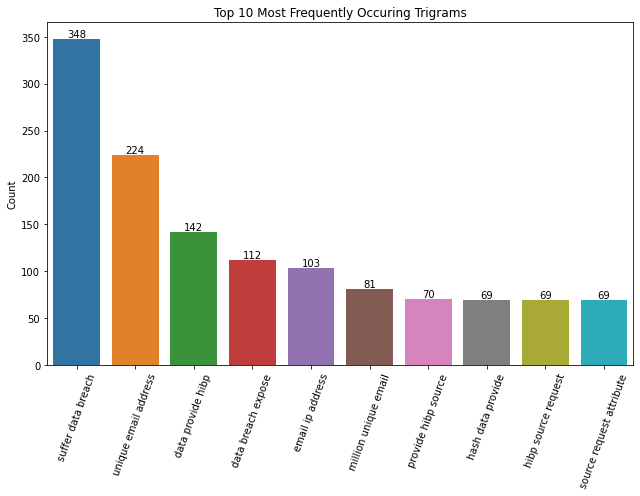

In [39]:
plt.figure(figsize=(9, 7))
ax = sns.barplot(x=df_tri['Trigram'].values, y=df_tri['Count'].values)

# Display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.ylabel('Count')
plt.title('Top 10 Most Frequently Occuring Trigrams')

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [40]:
df.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,...,IsSpamList,IsMalware,DescriptionText,WebsiteLink,DescriptionClean,Description_Cluster,Length,Description_nltk,bigrams_Description_nltk,trigrams_Description_nltk
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45,2017-12-10 21:44:27,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,False,False,"In approximately March 2015, the free web host...",http://www.troyhunt.com/2015/10/breaches-trade...,In approximately March 2015 the free web hosti...,3,44,approximately march free web host provider suf...,"[(approximately, march), (march, free), (free,...","[(approximately, march, free), (march, free, w..."
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50,2020-11-15 01:07:10,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,False,False,"In March 2020, the stock photo site 123RF suff...",https://www.bleepingcomputer.com/news/security...,In March 2020 the stock photo site 123RF suffe...,2,48,march stock photo site suffer data breach impa...,"[(march, stock), (stock, photo), (photo, site)...","[(march, stock, photo), (stock, photo, site), ..."
2,126,126,126.com,2012-01-01,2016-10-08 07:46:05,2016-10-08 07:46:05,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",...,False,False,"In approximately 2012, it's alleged that the C...",http://126.com,In approximately 2012 it is alleged that the C...,3,71,approximately allege chinese email service kno...,"[(approximately, allege), (allege, chinese), (...","[(approximately, allege, chinese), (allege, ch..."
3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03,2016-07-08 01:55:03,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",...,False,False,"In April 2016, customer data obtained from the...",http://motherboard.vice.com/read/another-day-a...,In April 2016 customer data obtained from the ...,3,44,april customer data obtain stream app know app...,"[(april, customer), (customer, data), (data, o...","[(april, customer, data), (customer, data, obt..."
4,17173,17173,17173.com,2011-12-28,2018-04-28 04:53:15,2018-04-28 04:53:15,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",...,False,False,"In late 2011, a series of data breaches in Chi...",https://news.softpedia.com/news/China-Investig...,In late 2011 a series of data breaches in Chin...,4,83,late series data breach china affected million...,"[(late, series), (series, data), (data, breach...","[(late, series, data), (series, data, breach),..."


### Sentiment Analysis of Description

In [41]:
# Ref: https://realpython.com/python-nltk-sentiment-analysis/#creating-frequency-distributions
# Ref: https://digitalenvironment.org/natural-language-processing-vader-sentiment-analysis-with-nltk/

from nltk.sentiment import SentimentIntensityAnalyzer
from statistics import mean

def get_sentiment(text):
    sentences = sent_tokenize(text)

    # print(f'Number of sentences: {len(sentences)}')

    # Initialize sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Analyze sentiment of each sentence
    sentiment_scores = []
    for sentence in sentences:
        sentiment_scores.append(analyzer.polarity_scores(sentence)['compound'])

    # Calculate overall sentiment
    overall_sentiment = mean(sentiment_scores) # sum(sentiment_scores) / len(sentiment_scores)

    if overall_sentiment >= 0.05:
        return 'Positive'
    elif overall_sentiment <= -0.05:
        return 'Negative'
    else: 
        return 'Neutral'

In [42]:
df['Vader_Sentiment'] = df['DescriptionClean'].apply(lambda x: get_sentiment(x))

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Name                       650 non-null    object
 1   Title                      650 non-null    object
 2   Domain                     624 non-null    object
 3   BreachDate                 650 non-null    object
 4   AddedDate                  650 non-null    object
 5   ModifiedDate               650 non-null    object
 6   PwnCount                   650 non-null    int64 
 7   Description                650 non-null    object
 8   LogoPath                   650 non-null    object
 9   DataClasses                650 non-null    object
 10  IsVerified                 650 non-null    bool  
 11  IsFabricated               650 non-null    bool  
 12  IsSensitive                650 non-null    bool  
 13  IsRetired                  650 non-null    bool  
 14  IsSpamList

In [44]:
df.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,...,IsMalware,DescriptionText,WebsiteLink,DescriptionClean,Description_Cluster,Length,Description_nltk,bigrams_Description_nltk,trigrams_Description_nltk,Vader_Sentiment
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45,2017-12-10 21:44:27,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,False,"In approximately March 2015, the free web host...",http://www.troyhunt.com/2015/10/breaches-trade...,In approximately March 2015 the free web hosti...,3,44,approximately march free web host provider suf...,"[(approximately, march), (march, free), (free,...","[(approximately, march, free), (march, free, w...",Negative
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50,2020-11-15 01:07:10,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,False,"In March 2020, the stock photo site 123RF suff...",https://www.bleepingcomputer.com/news/security...,In March 2020 the stock photo site 123RF suffe...,2,48,march stock photo site suffer data breach impa...,"[(march, stock), (stock, photo), (photo, site)...","[(march, stock, photo), (stock, photo, site), ...",Negative
2,126,126,126.com,2012-01-01,2016-10-08 07:46:05,2016-10-08 07:46:05,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",...,False,"In approximately 2012, it's alleged that the C...",http://126.com,In approximately 2012 it is alleged that the C...,3,71,approximately allege chinese email service kno...,"[(approximately, allege), (allege, chinese), (...","[(approximately, allege, chinese), (allege, ch...",Negative
3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03,2016-07-08 01:55:03,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",...,False,"In April 2016, customer data obtained from the...",http://motherboard.vice.com/read/another-day-a...,In April 2016 customer data obtained from the ...,3,44,april customer data obtain stream app know app...,"[(april, customer), (customer, data), (data, o...","[(april, customer, data), (customer, data, obt...",Neutral
4,17173,17173,17173.com,2011-12-28,2018-04-28 04:53:15,2018-04-28 04:53:15,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",...,False,"In late 2011, a series of data breaches in Chi...",https://news.softpedia.com/news/China-Investig...,In late 2011 a series of data breaches in Chin...,4,83,late series data breach china affected million...,"[(late, series), (series, data), (data, breach...","[(late, series, data), (series, data, breach),...",Negative


In [45]:
value_counts = df['Vader_Sentiment'].value_counts()

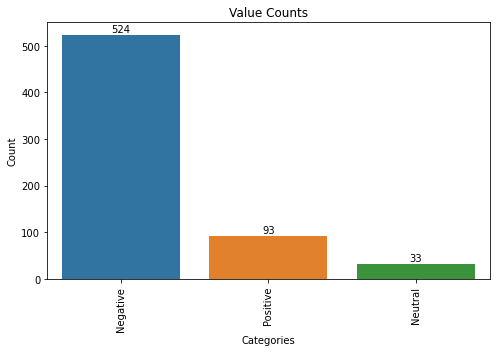

In [46]:
# Plot the value counts
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=value_counts.index, y=value_counts.values)

# Display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Value Counts')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Topic modelling with CountVectorizer() & LDA

In [47]:
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# Ref: https://www.studytonight.com/post/scikitlearn-countvectorizer-in-nlp

from sklearn.decomposition import LatentDirichletAllocation

# LATENT DIRICHLET ALLOCATION (LDA) TOPIC MODELLING

tf_vectorizer = CountVectorizer(max_df=0.90, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(df['Description_nltk'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names_out()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

lda_model = LatentDirichletAllocation(n_components=10, learning_method='online',max_iter=50, random_state=0).fit(tf)
no_top_words = 2
def display_topics(model, feature_names, no_top_words):
    for topix_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topix_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words-1:-1]]))
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
data breach
Topic 1:
data include
Topic 2:
june discover
Topic 3:
data breach
Topic 4:
attack service
Topic 5:
forum password
Topic 6:
data breach
Topic 7:
february leak
Topic 8:
data breach
Topic 9:
forum password


In [48]:
# Check vocabulary
# "The numbers here are not the count, they are the positions in the sparse vector."
tf_vectorizer.vocabulary_

{'approximately': 9,
 'march': 69,
 'web': 126,
 'suffer': 115,
 'data': 30,
 'breach': 18,
 'expose': 38,
 'almost': 4,
 'million': 75,
 'customer': 28,
 'record': 97,
 'sell': 105,
 'october': 81,
 'include': 54,
 'name': 77,
 'plain': 87,
 'text': 116,
 'password': 83,
 'site': 109,
 'impact': 52,
 'subscriber': 113,
 'subsequently': 114,
 'online': 82,
 'ip': 56,
 'physical': 86,
 'phone': 85,
 'number': 79,
 'store': 112,
 'hash': 48,
 'provide': 92,
 'hibp': 49,
 'dehashedcom': 34,
 'service': 107,
 'know': 60,
 'whilst': 128,
 'due': 37,
 'read': 96,
 'pwned': 95,
 'april': 10,
 'obtain': 80,
 'appear': 8,
 'list': 65,
 'sale': 102,
 'marketplace': 70,
 'contain': 25,
 'unique': 119,
 'along': 5,
 'usernames': 123,
 'unsalted': 120,
 'user': 122,
 'game': 45,
 'salt': 103,
 'february': 41,
 'found': 44,
 'file': 42,
 'december': 33,
 'forum': 43,
 'discover': 36,
 'vbulletin': 124,
 'message': 74,
 'community': 21,
 'incident': 53,
 'alongside': 6,
 'gender': 46,
 'date': 32,
 '

In [49]:
print('Length of vocabulary: ', len(tf_vectorizer.vocabulary_))

# Shape returned (650, 2681) means 650 rows(sentences) and 3614 columns(unique words)
print('Shape: ', tf.shape)

Length of vocabulary:  130
Shape:  (650, 130)


In [50]:
# Get features name at a specific index
features = tf_vectorizer.get_feature_names_out()
features[54]

'include'

In [51]:
tf_vectorizer.vocabulary_['service']

107

In [52]:
# print(vectorizer.stop_words_)

### Feature Engineering - PasswordStored

In [53]:
# GROUP PASSWORD_STORAGE EXTRACTED FROM "DescriptionText" COLUMN:

def categorise(text):
    if "MD5" in text:
        return "MD5"
    if "SHA-" in text:
        return "SHA"
    if "bcrypt" in text:
        return "bcrypt"
    else:
        return "Other"

df['PasswordStored'] = [categorise(text) for text in df['DescriptionText']]
df['PasswordStored'].value_counts()

Other     347
MD5       187
bcrypt     72
SHA        44
Name: PasswordStored, dtype: int64

### Feature Engineering - Date columns

In [54]:
def preprocessing(df):
    # Convert date column from object to date
    df["BreachDate"] = pd.to_datetime(df["BreachDate"])
    df["AddedDate"] = pd.to_datetime(df["AddedDate"])
    df["ModifiedDate"] = pd.to_datetime(df["ModifiedDate"])
    df['Year'] = df['BreachDate'].dt.year
    df['Month'] = df['BreachDate'].dt.month
    df["Quarter"] = df['BreachDate'].dt.quarter
    
preprocessing(df)

In [55]:
df.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,...,Description_Cluster,Length,Description_nltk,bigrams_Description_nltk,trigrams_Description_nltk,Vader_Sentiment,PasswordStored,Year,Month,Quarter
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45,2017-12-10 21:44:27,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,3,44,approximately march free web host provider suf...,"[(approximately, march), (march, free), (free,...","[(approximately, march, free), (march, free, w...",Negative,Other,2015,3,1
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50,2020-11-15 01:07:10,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,2,48,march stock photo site suffer data breach impa...,"[(march, stock), (stock, photo), (photo, site)...","[(march, stock, photo), (stock, photo, site), ...",Negative,MD5,2020,3,1
2,126,126,126.com,2012-01-01,2016-10-08 07:46:05,2016-10-08 07:46:05,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",...,3,71,approximately allege chinese email service kno...,"[(approximately, allege), (allege, chinese), (...","[(approximately, allege, chinese), (allege, ch...",Negative,Other,2012,1,1
3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03,2016-07-08 01:55:03,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",...,3,44,april customer data obtain stream app know app...,"[(april, customer), (customer, data), (data, o...","[(april, customer, data), (customer, data, obt...",Neutral,MD5,2016,4,2
4,17173,17173,17173.com,2011-12-28,2018-04-28 04:53:15,2018-04-28 04:53:15,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",...,4,83,late series data breach china affected million...,"[(late, series), (series, data), (data, breach...","[(late, series, data), (series, data, breach),...",Negative,MD5,2011,12,4


In [56]:
df['Timelag'] = (df['AddedDate'] - df["BreachDate"])
df['Timelag(Days)'] = df['Timelag'].apply(lambda x: x.days)

In [57]:
# Top 5 breaches order by TimeLag(Days)
df.iloc[df['Timelag(Days)'].nlargest().index.values,:]

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,...,Description_nltk,bigrams_Description_nltk,trigrams_Description_nltk,Vader_Sentiment,PasswordStored,Year,Month,Quarter,Timelag,Timelag(Days)
159,DivXSubTitles,DivX SubTitles,divxsubtitles.net,2010-01-01,2022-06-14 02:57:46,2022-06-14 04:55:40,783058,"In approximately 2010, the now defunct website...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",...,approximately defunct website divx subtitle su...,"[(approximately, defunct), (defunct, website),...","[(approximately, defunct, website), (defunct, ...",Negative,Other,2010,1,1,4547 days 02:57:46,4547
57,BabyNames,Baby Names,babynames.com,2008-10-24,2018-10-24 06:27:03,2018-10-24 06:27:30,846742,"In approximately 2008, the site to help parent...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",...,approximately site help parent name child know...,"[(approximately, site), (site, help), (help, p...","[(approximately, site, help), (site, help, par...",Negative,MD5,2008,10,4,3652 days 06:27:03,3652
253,gPotato,gPotato,gpotato.com,2007-07-12,2016-09-24 21:37:43,2016-09-24 21:37:43,2136520,"In July 2007, the multiplayer game portal know...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",...,july multiplayer game portal know gpotato link...,"[(july, multiplayer), (multiplayer, game), (ga...","[(july, multiplayer, game), (multiplayer, game...",Neutral,MD5,2007,7,3,3362 days 21:37:43,3362
357,MechoDownload,Mecho Download,mechodownload.com,2013-10-31,2022-08-02 04:04:59,2022-08-02 04:10:06,437928,"In October 2013, the (now defunct) downloads w...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Passwords...",...,october defunct downloads website mecho downlo...,"[(october, defunct), (defunct, downloads), (do...","[(october, defunct, downloads), (defunct, down...",Negative,MD5,2013,10,4,3197 days 04:04:59,3197
295,JD,JD,jd.com,2013-01-01,2021-06-02 07:06:02,2021-06-02 07:06:02,77449341,"In 2013 (exact date unknown), the Chinese e-co...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Phone number...",...,exact date unknown chinese ecommerce service j...,"[(exact, date), (date, unknown), (unknown, chi...","[(exact, date, unknown), (date, unknown, chine...",Negative,SHA,2013,1,1,3074 days 07:06:02,3074


In [58]:
# Top 5 breaches order by PwnCount
df.iloc[df['PwnCount'].nlargest().index.values,:]

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,...,Description_nltk,bigrams_Description_nltk,trigrams_Description_nltk,Vader_Sentiment,PasswordStored,Year,Month,Quarter,Timelag,Timelag(Days)
125,Collection1,Collection #1,NaN,2019-01-07,2019-01-16 21:46:07,2019-01-16 21:50:21,772904991,"In January 2019, a large collection of credent...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",...,january large collection credential stuff list...,"[(january, large), (large, collection), (colle...","[(january, large, collection), (large, collect...",Positive,Other,2019,1,1,9 days 21:46:07,9
587,VerificationsIO,Verifications.io,verifications.io,2019-02-25,2019-03-09 19:29:54,2019-03-09 20:49:51,763117241,"In February 2019, the email address validation...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Employe...",...,february email address validation service veri...,"[(february, email), (email, address), (address...","[(february, email, address), (email, address, ...",Negative,Other,2019,2,1,12 days 19:29:54,12
411,OnlinerSpambot,Onliner Spambot,NaN,2017-08-28,2017-08-29 19:25:56,2017-08-29 19:25:56,711477622,"In August 2017, a spambot by the name of <a hr...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",...,august spambot name onliner spambot identify s...,"[(august, spambot), (spambot, name), (name, on...","[(august, spambot, name), (spambot, name, onli...",Negative,Other,2017,8,3,1 days 19:25:56,1
146,PDL,Data Enrichment Exposure From PDL Customer,NaN,2019-10-16,2019-11-22 20:13:04,2019-11-22 20:13:04,622161052,"In October 2019, <a href=""https://www.troyhunt...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Employers', 'Geographic l...",...,october security researcher vinny troia bob di...,"[(october, security), (security, researcher), ...","[(october, security, researcher), (security, r...",Negative,Other,2019,10,4,37 days 20:13:04,37
203,ExploitIn,Exploit.In,NaN,2016-10-13,2017-05-06 07:03:18,2017-05-06 07:03:18,593427119,"In late 2016, a huge list of email address and...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",...,late huge list email address password pair app...,"[(late, huge), (huge, list), (list, email), (e...","[(late, huge, list), (huge, list, email), (lis...",Negative,Other,2016,10,4,205 days 07:03:18,205


### Feature Engineering - Data Classes Count

In [59]:
df["DataClassesCount"] = df["DataClasses"].apply(lambda x: np.array(eval(x)), 0).apply(lambda x: x.size)

### Feature Engineering - Severity Level as Target variable

In [60]:
df['PwnCount'].head()

0    14936670
1     8661578
2     6414191
3     4009640
4     7485802
Name: PwnCount, dtype: int64

#### Discretisation Transform PwnCount

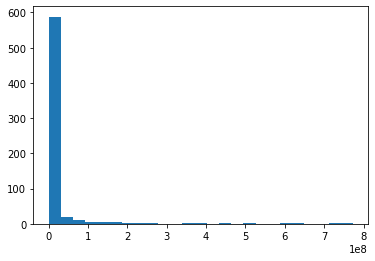

In [61]:
# https://machinelearningmastery.com/discretization-transforms-for-machine-learning/

# reshape data to have rows and columns
data = np.reshape(df['PwnCount'].values, (len(df['PwnCount']),1))
plt.hist(data, bins=25)
plt.show()

In [62]:
data

array([[ 14936670],
       [  8661578],
       [  6414191],
       [  4009640],
       [  7485802],
       [ 80115532],
       [    17706],
       [ 14867999],
       [  9121434],
       [ 15025407],
       [ 17979961],
       [   776125],
       [   919790],
       [  1372550],
       [   432943],
       [  1583193],
       [  9363740],
       [  4284538],
       [  5470063],
       [152445165],
       [  3867997],
       [169746810],
       [   186082],
       [    66308],
       [    90478],
       [   180468],
       [ 20580060],
       [   305470],
       [  6496778],
       [   266399],
       [   917461],
       [   108940],
       [   297806],
       [   745355],
       [  7104998],
       [  1431378],
       [   368507],
       [ 22437749],
       [457962538],
       [125929660],
       [    49681],
       [  5888405],
       [ 20012235],
       [ 10604307],
       [  1531235],
       [  1079970],
       [   157692],
       [ 30811934],
       [     5788],
       [  1436486],


In [63]:
from sklearn.preprocessing import KBinsDiscretizer

# discretization transform the raw data
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
data_trans = kbins.fit_transform(data)
# summarize first few rows
# print(data_trans[5:, :])
# histogram of the transformed data
# plt.hist(data_trans, bins=3)
# plt.show()

In [64]:
data_trans.shape

(650, 1)

In [65]:
df_pc = pd.DataFrame({'PwnCount': data[:,0], 'pwnCount_disc': data_trans[:,0]})

In [66]:
df_pc['pwnCount_disc'].value_counts()

2.0    217
0.0    217
1.0    216
Name: pwnCount_disc, dtype: int64

In [67]:
df_pc[df_pc['pwnCount_disc'] == 2.0].PwnCount.max()

772904991

In [68]:
df_pc[df_pc['pwnCount_disc'] == 2.0].PwnCount.min()

3465259

In [69]:
df_pc[df_pc['pwnCount_disc'] == 1.0].PwnCount.max()

3439414

In [70]:
df_pc[df_pc['pwnCount_disc'] == 1.0].PwnCount.min()

492518

In [71]:
df_pc[df_pc['pwnCount_disc'] == 0.0].PwnCount.max()

483015

In [72]:
df_pc[df_pc['pwnCount_disc'] == 0.0].PwnCount.min()

858

In [73]:
df_pc[(df_pc['PwnCount'] >= 483015) & (df_pc['PwnCount'] <= 492518)]

,PwnCount,pwnCount_disc
133,483015,0.0
447,492518,1.0


In [74]:
df['PwnCount_disc'] = data_trans[:,0]

In [75]:
def severity_level(number):
    if number == 2.0:
        return 'Large'
    elif number == 1.0:
        return 'Medium'
    else: 
        return 'Small'

df['Severity'] = df['PwnCount_disc'].apply(lambda x: severity_level(x))

In [76]:
df['Severity'].value_counts()

Large     217
Small     217
Medium    216
Name: Severity, dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Name                       650 non-null    object         
 1   Title                      650 non-null    object         
 2   Domain                     624 non-null    object         
 3   BreachDate                 650 non-null    datetime64[ns] 
 4   AddedDate                  650 non-null    datetime64[ns] 
 5   ModifiedDate               650 non-null    datetime64[ns] 
 6   PwnCount                   650 non-null    int64          
 7   Description                650 non-null    object         
 8   LogoPath                   650 non-null    object         
 9   DataClasses                650 non-null    object         
 10  IsVerified                 650 non-null    bool           
 11  IsFabricated               650 non-null    bool           

In [78]:
# df.to_csv('df_model3.csv', index = False)

In [79]:
# Convert to str datatype for categorical values
def convert_to_string():
    df['Year'] = df['Year'].astype(str)
    df['Month'] = df['Month'].astype(str)
    df["Quarter"] = df['Quarter'].astype(str)
convert_to_string()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Name                       650 non-null    object         
 1   Title                      650 non-null    object         
 2   Domain                     624 non-null    object         
 3   BreachDate                 650 non-null    datetime64[ns] 
 4   AddedDate                  650 non-null    datetime64[ns] 
 5   ModifiedDate               650 non-null    datetime64[ns] 
 6   PwnCount                   650 non-null    int64          
 7   Description                650 non-null    object         
 8   LogoPath                   650 non-null    object         
 9   DataClasses                650 non-null    object         
 10  IsVerified                 650 non-null    bool           
 11  IsFabricated               650 non-null    bool           

### Timelag - Convert from continuous to categorical

In [81]:
df['Timelag(Years)'] = df['Timelag(Days)'] / 365

In [82]:
def time_lag_by_year(number):
    if number < 1:
        return 'More than a year'
    else: 
        return 'Less than a year'

df['Timelag(Years)_disc'] = df['Timelag(Years)'].apply(lambda x: time_lag_by_year(x))

In [83]:
df['Timelag(Years)_disc'].value_counts(normalize=True)

More than a year    0.623077
Less than a year    0.376923
Name: Timelag(Years)_disc, dtype: float64

### Length/Word count of description - Convert from continous to categorical

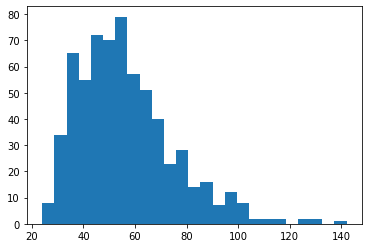

In [84]:
# reshape data to have rows and columns
data = np.reshape(df['Length'].values, (len(df['Length']),1))
plt.hist(data, bins=25)
plt.show()

In [85]:
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
data_trans = kbins.fit_transform(data)

In [86]:
df['Length_disc'] = data_trans[:,0]

In [87]:
df.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,...,Month,Quarter,Timelag,Timelag(Days),DataClassesCount,PwnCount_disc,Severity,Timelag(Years),Timelag(Years)_disc,Length_disc
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45,2017-12-10 21:44:27,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,3,1,239 days 23:35:45,239,4,2.0,Large,0.654795,More than a year,0.0
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50,2020-11-15 01:07:10,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,3,1,238 days 00:59:50,238,7,2.0,Large,0.652055,More than a year,1.0
2,126,126,126.com,2012-01-01,2016-10-08 07:46:05,2016-10-08 07:46:05,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",...,1,1,1742 days 07:46:05,1742,2,2.0,Large,4.772603,Less than a year,2.0
3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03,2016-07-08 01:55:03,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",...,4,2,80 days 01:55:03,80,5,2.0,Large,0.219178,More than a year,0.0
4,17173,17173,17173.com,2011-12-28,2018-04-28 04:53:15,2018-04-28 04:53:15,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",...,12,4,2313 days 04:53:15,2313,3,2.0,Large,6.336986,Less than a year,2.0


### Data Classes Count - Convert to string as categorical variable

In [88]:
df["DataClassesCount_str"] = df['DataClassesCount'].astype(str)

In [89]:
df["DataClassesCount_str"].value_counts()

4     145
5      91
3      88
6      81
2      69
7      54
8      44
9      19
10     17
11     11
12      8
1       7
13      5
16      3
20      2
15      2
19      1
25      1
14      1
17      1
Name: DataClassesCount_str, dtype: int64

### Frequency encoding - Categorical columns

In [90]:
nominal_col = ['IsVerified', 'IsFabricated', 'IsSensitive', 'IsRetired', 'IsSpamList', 'IsMalware', 'Vader_Sentiment', 'PasswordStored', 'Description_Cluster', 'Year', 'Month', 'Quarter', 'Timelag(Years)_disc', 'Length_disc', 'DataClassesCount_str']

for col in nominal_col:
    # generate the frequency encoding for each categorical value in the target column
    fr_enc = (df.groupby(col).size()) / len(df)

    # # print the encoding values
    # print(fr_enc)

    # create a new column that apply frequency encoding to Age Group
    df[col+"_Encoded"] = df[col].apply(lambda x : fr_enc[x]) 

In [91]:
df.head()

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,...,IsMalware_Encoded,Vader_Sentiment_Encoded,PasswordStored_Encoded,Description_Cluster_Encoded,Year_Encoded,Month_Encoded,Quarter_Encoded,Timelag(Years)_disc_Encoded,Length_disc_Encoded,DataClassesCount_str_Encoded
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45,2017-12-10 21:44:27,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,0.993846,0.806154,0.533846,0.301538,0.113846,0.072308,0.283077,0.623077,0.324615,0.223077
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50,2020-11-15 01:07:10,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",...,0.993846,0.806154,0.287692,0.238462,0.127692,0.072308,0.283077,0.623077,0.332308,0.083077
2,126,126,126.com,2012-01-01,2016-10-08 07:46:05,2016-10-08 07:46:05,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",...,0.993846,0.806154,0.533846,0.301538,0.027692,0.127692,0.283077,0.376923,0.343077,0.106154
3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03,2016-07-08 01:55:03,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",...,0.993846,0.050769,0.287692,0.301538,0.146154,0.056923,0.229231,0.623077,0.324615,0.140000
4,17173,17173,17173.com,2011-12-28,2018-04-28 04:53:15,2018-04-28 04:53:15,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",...,0.993846,0.806154,0.287692,0.135385,0.026154,0.098462,0.240000,0.376923,0.343077,0.135385


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   Name                          650 non-null    object         
 1   Title                         650 non-null    object         
 2   Domain                        624 non-null    object         
 3   BreachDate                    650 non-null    datetime64[ns] 
 4   AddedDate                     650 non-null    datetime64[ns] 
 5   ModifiedDate                  650 non-null    datetime64[ns] 
 6   PwnCount                      650 non-null    int64          
 7   Description                   650 non-null    object         
 8   LogoPath                      650 non-null    object         
 9   DataClasses                   650 non-null    object         
 10  IsVerified                    650 non-null    bool           
 11  IsFabricated       

https://datascience.stackexchange.com/questions/54244/purpose-of-converting-continuous-data-to-categorical-data

Your intuition is generally correct - in many cases, premature discretization of continuous variables is undesirable. Doing so throws away potentially meaningful data, and the result can be highly dependent on exactly how you bucket the continuous variables, which is usually done rather arbitrarily. Bucketing people by age decade, for example, implies that there is more similarity between a 50-year-old and a 59-year-old than there is between a 59-year-old and a 60-year-old. There can be some advantages in statistical power to doing this, but if your binning doesn't reflect natural cutpoints in the data, you may just be throwing away valuable information.


When we convert continuous to categorical variables, valuable information might be thrown away.

### Create new dataframe for modelling

In [93]:
# Create new dataframe for modelling
df_model = pd.DataFrame(df, columns=[ 
                                              'Year_Encoded', 'Month_Encoded', 'Quarter_Encoded', 
                                                'Timelag(Years)_disc_Encoded',
                                                'DataClassesCount_str_Encoded', 'Length_disc_Encoded', 
                                                'IsVerified_Encoded','IsFabricated_Encoded','IsSensitive_Encoded',
                                                'IsRetired_Encoded','IsSpamList_Encoded','IsMalware_Encoded',               
                                                'Vader_Sentiment_Encoded', 'PasswordStored_Encoded', 
                                                'Description_Cluster_Encoded', 
                                                'Severity'
                                              ])

In [94]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year_Encoded                  650 non-null    float64
 1   Month_Encoded                 650 non-null    float64
 2   Quarter_Encoded               650 non-null    float64
 3   Timelag(Years)_disc_Encoded   650 non-null    float64
 4   DataClassesCount_str_Encoded  650 non-null    float64
 5   Length_disc_Encoded           650 non-null    float64
 6   IsVerified_Encoded            650 non-null    float64
 7   IsFabricated_Encoded          650 non-null    float64
 8   IsSensitive_Encoded           650 non-null    float64
 9   IsRetired_Encoded             650 non-null    float64
 10  IsSpamList_Encoded            650 non-null    float64
 11  IsMalware_Encoded             650 non-null    float64
 12  Vader_Sentiment_Encoded       650 non-null    float64
 13  Passw

In [95]:
df_model.head()

,Year_Encoded,Month_Encoded,Quarter_Encoded,Timelag(Years)_disc_Encoded,DataClassesCount_str_Encoded,Length_disc_Encoded,IsVerified_Encoded,IsFabricated_Encoded,IsSensitive_Encoded,IsRetired_Encoded,IsSpamList_Encoded,IsMalware_Encoded,Vader_Sentiment_Encoded,PasswordStored_Encoded,Description_Cluster_Encoded,Severity
0,0.113846,0.072308,0.283077,0.623077,0.223077,0.324615,0.943077,0.995385,0.916923,0.998462,0.983077,0.993846,0.806154,0.533846,0.301538,Large
1,0.127692,0.072308,0.283077,0.623077,0.083077,0.332308,0.943077,0.995385,0.916923,0.998462,0.983077,0.993846,0.806154,0.287692,0.238462,Large
2,0.027692,0.127692,0.283077,0.376923,0.106154,0.343077,0.056923,0.995385,0.916923,0.998462,0.983077,0.993846,0.806154,0.533846,0.301538,Large
3,0.146154,0.056923,0.229231,0.623077,0.140000,0.324615,0.943077,0.995385,0.916923,0.998462,0.983077,0.993846,0.050769,0.287692,0.301538,Large
4,0.026154,0.098462,0.240000,0.376923,0.135385,0.343077,0.056923,0.995385,0.916923,0.998462,0.983077,0.993846,0.806154,0.287692,0.135385,Large


## Building classifiers

### Import dependencies

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import datasets, preprocessing, svm
from sklearn.model_selection import cross_validate

### Standardisation & PCA

In [97]:
# split explanatory variables (X) from the response variable (y)
X = df_model.iloc[:,:-1].values
y = df_model.iloc[:,-1].values

# split data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)


total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
n_to_reach_95 = X.shape[1] - n_over_95 + 1
print("Number features: {}\tTotal Variance Explained: {}".format(n_to_reach_95, total_explained_variance[n_to_reach_95 - 1]))

Number features: 13	Total Variance Explained: 0.9654020409267536


- 13 is the number of features that will help to maintain 95% variance. 

### Naive Bayes with Standardisation & PCA

- As all explanatory variables are categorical variables, we will use CategoricalNB.

In [121]:
df_model.head()

,Year_Encoded,Month_Encoded,Quarter_Encoded,Timelag(Years)_disc_Encoded,DataClassesCount_str_Encoded,Length_disc_Encoded,IsVerified_Encoded,IsFabricated_Encoded,IsSensitive_Encoded,IsRetired_Encoded,IsSpamList_Encoded,IsMalware_Encoded,Vader_Sentiment_Encoded,PasswordStored_Encoded,Description_Cluster_Encoded,Severity
0,0.113846,0.072308,0.283077,0.623077,0.223077,0.324615,0.943077,0.995385,0.916923,0.998462,0.983077,0.993846,0.806154,0.533846,0.301538,Large
1,0.127692,0.072308,0.283077,0.623077,0.083077,0.332308,0.943077,0.995385,0.916923,0.998462,0.983077,0.993846,0.806154,0.287692,0.238462,Large
2,0.027692,0.127692,0.283077,0.376923,0.106154,0.343077,0.056923,0.995385,0.916923,0.998462,0.983077,0.993846,0.806154,0.533846,0.301538,Large
3,0.146154,0.056923,0.229231,0.623077,0.140000,0.324615,0.943077,0.995385,0.916923,0.998462,0.983077,0.993846,0.050769,0.287692,0.301538,Large
4,0.026154,0.098462,0.240000,0.376923,0.135385,0.343077,0.056923,0.995385,0.916923,0.998462,0.983077,0.993846,0.806154,0.287692,0.135385,Large


In [141]:
from sklearn.naive_bayes import CategoricalNB

X = df_model.drop('Severity', axis=1)
y = df_model['Severity']


# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# fit a CategoricalNB classifier to the training set
clf = CategoricalNB()
clf.fit(X_train, y_train)

# perform classification on the test set
y_hat = clf.predict(X_test)

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
    precision_score, recall_score
)

# print performance
print("\nPrediction accuracy on the test dataset:")
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_hat).sum()))

precision_score = precision_score(y_test, y_hat, average='macro')
recall_score = recall_score(y_test, y_hat, average='macro')
f1_score = f1_score(y_test, y_hat, average='macro')

print("CategoricalNB")
# accuracy
print(f'Accuracy: {accuracy_score(y_test, y_hat)*100:.3f}')

# precision
print(f'Precision: {precision_score:.3f}')

# recall
print(f'Recall: {recall_score:.3f}')

# F1 (F-Measure)
print(f'F1: {f1_score:.3f}')


Prediction accuracy on the test dataset:
Number of mislabeled points out of a total 195 points : 139
CategoricalNB
Accuracy: 28.718
Precision: 0.096
Recall: 0.333
F1: 0.149


C:\Apps\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ML Pipelines with training/test split

- Ref: https://lerekoqholosha9.medium.com/creating-a-pipelines-using-sklearn-machine-learning-c329d4cf8a5f

In [107]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest
pipeline_rf=Pipeline([('scalar1',StandardScaler()),
('pca1', PCA(n_components=13)),
('RandomForest_classifier', RandomForestClassifier())])

# SVC - Linear pipeline
pipeline_svc_ln=Pipeline([('scalar2', StandardScaler()),
('pca2', PCA(n_components=13)),
('svc_linear_classifier', SVC(kernel='linear'))])

# SVC - RBF pipeline
pipeline_svc_rbf=Pipeline([('scalar3', StandardScaler()),
('pca3', PCA(n_components=13)),
('svc_rbf_classifier', SVC(kernel='rbf'))])

In [108]:
pipelines = [pipeline_rf, pipeline_svc_ln, pipeline_svc_rbf]
#create variable for accuarcy and best model
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [109]:
pipe_dict = { 0: 'RandomForest', 1: 'SVC_Linear', 2: 'SVC_RBF'}
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [110]:
for i, model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

RandomForest Test Accuracy: 0.40512820512820513
SVC_Linear Test Accuracy: 0.4
SVC_RBF Test Accuracy: 0.40512820512820513


In [111]:
#best classifier
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
        print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


### Support Vector Machine - Linear kernel with Feature weights

In [148]:
from sklearn.svm import SVC

# split explanatory variables (X) from the response variable (y)
x = df_model.iloc[:,:-1].values
y = df_model.iloc[:,-1].values

# split data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# create an instance of the SVM classifier with a Linear kernel
clf = SVC(kernel='linear')
# clf = SVC(kernel='rbf')  # activate this to train a non-linear SVM

# train the model using the training set
clf.fit(X_train, y_train)

# predict the classes in the test set
y_hat = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_hat)

# Evaluate the model
# print accuracy
print("\nAccuracy: %.3f%%" % (metrics.accuracy_score(y_test, y_hat)*100))

# get feature weights
print("\nFeature weights:")
# get a list of variable (feature) names
f_names = df_model.columns[:-1].tolist()
print('\n')
print(f'Feature names: {f_names}')

# get each feature weight learned by SVM
f_weights = clf.coef_[0].tolist()

# remove any sign from the weights
f_weights_abs = [abs(x) for x in f_weights]
    
# match weight with feature name, and sort in descending order of weight
srt_list = list(zip(f_weights_abs, f_names))
srt_list.sort(reverse=True)

print('\n')
# print
for e in srt_list:
    print(e[1], ": ", e[0])


Accuracy: 35.897%

Feature weights:


Feature names: ['Year_Encoded', 'Month_Encoded', 'Quarter_Encoded', 'Timelag(Years)_disc_Encoded', 'DataClassesCount_str_Encoded', 'Length_disc_Encoded', 'IsVerified_Encoded', 'IsFabricated_Encoded', 'IsSensitive_Encoded', 'IsRetired_Encoded', 'IsSpamList_Encoded', 'IsMalware_Encoded', 'Vader_Sentiment_Encoded', 'PasswordStored_Encoded', 'Description_Cluster_Encoded']


Vader_Sentiment_Encoded :  2.4197022124898666
IsVerified_Encoded :  2.217505053467761
IsSpamList_Encoded :  1.932307692307674
IsMalware_Encoded :  0.9876923076922992
Description_Cluster_Encoded :  0.7220848931766888
Quarter_Encoded :  0.47096533710410426
Year_Encoded :  0.45852995085532733
Timelag(Years)_disc_Encoded :  0.36253496538243724
DataClassesCount_str_Encoded :  0.2963616823300974
Length_disc_Encoded :  0.2865834597131851
PasswordStored_Encoded :  0.190446910106715
Month_Encoded :  0.1674733115066207
IsFabricated_Encoded :  0.016043362562498942
IsSensitive_Encoded :  0.0
I

### Tuning SVM hyperparameters for better classification accuracy

In [142]:
# Learning materials

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# load dataset
X = df_model.drop('Severity', axis=1)
y = df_model['Severity']


# splitting data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 
                     'C': [1, 10, 100, 1000]}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring=score
    )
    
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:\n")
    print(clf.best_params_, "\n")
    
    print("Grid scores on development set:\n")
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std, params))
    print()

    print("Detailed classification report:\n")

    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.\n")
  
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1000, 'kernel': 'linear'} 

Grid scores on development set:

0.352 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.352 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.352 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.352 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.409 (+/-0.013) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.352 (+/-0.000) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.440 (+/-0.043) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.409 (+/-0.013) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.435 (+/-0.041) for {'C': 1, 'kernel': 'linear'}
0.431 (+/-0.054) for {'C': 10, 'kernel': 'linear'}
0.448 (+/-0.042) for {'C': 100, 'kernel': 'linear'}
0.459 (+/-0.047) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full 

- Precision and Recall should be as close to 1 as possible. 
- If f1 is high, accurcy tends to be high.
- f1 is the most reliable score.

### ML Pipelines with cross-validation

In [140]:
from sklearn import datasets, preprocessing, svm, metrics
from sklearn.model_selection import cross_validate

# B. Prepate the dataset
X = df_model.iloc[:,:-1].values
y = df_model.iloc[:,-1].values

classifiers = {
#     'CategoricalNB': CategoricalNB(alpha=1),
    'SVC_RBF': SVC(kernel="rbf"),
    'SVC_Linear': SVC(kernel="linear"),
    'RandomForest': RandomForestClassifier()
}

scoring = ['accuracy', 'recall_macro', 'precision_macro', 'f1_macro']

for name, classifier in classifiers.items():
    steps = [
        ('scalar',StandardScaler()),
        ('pca',PCA(n_components=13)),
        ('clf', classifier)
    ]
    pipe = Pipeline(steps)
    
    # E. Evaluate the model
    scores = cross_validate(pipe, X, y, cv=10, scoring=scoring)

    print(name)
    # accuracy
    print("Mean accuracy: %.3f%%" % (np.mean(scores['test_accuracy'])*100))

    # precision
    print("Mean precision: %.3f " % (np.mean(scores['test_precision_macro'])))

    # recall
    print("Mean recall: %.3f" % (np.mean(scores['test_recall_macro'])))

    # # F1 (F-Measure)
    print("Mean F1: %.3f" % (np.mean(scores['test_f1_macro'])))
    
    print('\n')

SVC_RBF
Mean accuracy: 48.000%
Mean precision: 0.482 
Mean recall: 0.480
Mean F1: 0.475


SVC_Linear
Mean accuracy: 45.692%
Mean precision: 0.451 
Mean recall: 0.457
Mean F1: 0.444


RandomForest
Mean accuracy: 46.923%
Mean precision: 0.471 
Mean recall: 0.469
Mean F1: 0.468




- With cross-validation, SVC RBF performs the best.

### Create new dataframe for linear regression

In [145]:
# # Create new dataframe for modelling
df_linregress2 = pd.DataFrame(df, columns=[ 
                                               'Year_Encoded', 'Month_Encoded', 'Quarter_Encoded', 
                                                'Timelag(Years)_disc_Encoded',
                                                'DataClassesCount_str_Encoded', 'Length_disc_Encoded', 
                                                'IsVerified_Encoded','IsFabricated_Encoded','IsSensitive_Encoded',
                                                'IsRetired_Encoded','IsSpamList_Encoded','IsMalware_Encoded',               
                                                'Vader_Sentiment_Encoded', 'PasswordStored_Encoded', 
                                                'Description_Cluster_Encoded',  
                                                'PwnCount'
                                              ])
df_linregress2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year_Encoded                  650 non-null    float64
 1   Month_Encoded                 650 non-null    float64
 2   Quarter_Encoded               650 non-null    float64
 3   Timelag(Years)_disc_Encoded   650 non-null    float64
 4   DataClassesCount_str_Encoded  650 non-null    float64
 5   Length_disc_Encoded           650 non-null    float64
 6   IsVerified_Encoded            650 non-null    float64
 7   IsFabricated_Encoded          650 non-null    float64
 8   IsSensitive_Encoded           650 non-null    float64
 9   IsRetired_Encoded             650 non-null    float64
 10  IsSpamList_Encoded            650 non-null    float64
 11  IsMalware_Encoded             650 non-null    float64
 12  Vader_Sentiment_Encoded       650 non-null    float64
 13  Passw

In [146]:
df_linregress2.head()

,Year_Encoded,Month_Encoded,Quarter_Encoded,Timelag(Years)_disc_Encoded,DataClassesCount_str_Encoded,Length_disc_Encoded,IsVerified_Encoded,IsFabricated_Encoded,IsSensitive_Encoded,IsRetired_Encoded,IsSpamList_Encoded,IsMalware_Encoded,Vader_Sentiment_Encoded,PasswordStored_Encoded,Description_Cluster_Encoded,PwnCount
0,0.113846,0.072308,0.283077,0.623077,0.223077,0.324615,0.943077,0.995385,0.916923,0.998462,0.983077,0.993846,0.806154,0.533846,0.301538,14936670
1,0.127692,0.072308,0.283077,0.623077,0.083077,0.332308,0.943077,0.995385,0.916923,0.998462,0.983077,0.993846,0.806154,0.287692,0.238462,8661578
2,0.027692,0.127692,0.283077,0.376923,0.106154,0.343077,0.056923,0.995385,0.916923,0.998462,0.983077,0.993846,0.806154,0.533846,0.301538,6414191
3,0.146154,0.056923,0.229231,0.623077,0.140000,0.324615,0.943077,0.995385,0.916923,0.998462,0.983077,0.993846,0.050769,0.287692,0.301538,4009640
4,0.026154,0.098462,0.240000,0.376923,0.135385,0.343077,0.056923,0.995385,0.916923,0.998462,0.983077,0.993846,0.806154,0.287692,0.135385,7485802


In [147]:
# df_linregress2.to_csv('df_regress2.csv', index = False)

In [ ]:
# df_model.to_csv('dfmodel.csv', index = False)

In [ ]:
# from pathlib import Path  
# filepath = Path('dfmodel.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# dfmodel.to_csv(filepath, index=False)